# Project Overview

Convolutional Neural Network (CNN) is a powerful tool commonly applied to image analysis
that is capable to outperform humans on some computer vision tasks.

Here an image classification pipeline for dog breed is presented.

The steps of this notebook are:

1. Clone the github repository with all the data to Google Drive
(an authorization is required).
2. Visualization of the training set.
3. Training of CNN model using transfer learning.
4. Classification of new data.



# Model

Given the large computer and time resources
required to develop neural network models,
**transfer learning** becomes an interesting option
on the area of computer vision.
In transfer learning,
a pre-trained model is used as starting point
for a second target network.

Here the [VGG-16](https://arxiv.org/abs/1409.1556)
model is used as starting point for image classification.



# Datasets

Two datasets are used in this project.

* ImageNet

  The pretrained VGG-16 model uses the
  [ImageNet](https://image-net.org/)
  database of images.
  This is a large database designed for use in visual object
  recognitiion.

* Images scraped from Google

  Additional data
  for training, validation and testing of the model
  was scrapped using Selenium,
  an open-source web-based automation tool.
  This additional was downloaded from google,
  compressed and stored in a
  [Github repository](https://github.com/oliveirampo/dog_breed_classification).
  New data can also be downloaded using the script provided
  [here](https://github.com/oliveirampo/dog_breed_classification/blob/main/scr/download_image.py).

# Metrics

The performance of the models trained is computed in terms of the accuracy, which is defined as
the number of corrected predictions divided by the total number of predictions, multiplyed by 100.

The dataset used here for image classification is balanced, thus accuracy is an appropriate option.
Otherwise, other metrics such as precision and recall could be better choices.



# Clone Repository and Import Libraries

Mount google drive - Click on the link and give authorization


In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pip install selenium

In [7]:
import sys
import os

In [8]:
projDir = '/content/drive/MyDrive/github_projects/'

if not os.path.exists(projDir):
  os.makedirs(projDir)

%cd $projDir
%ls

/content/drive/MyDrive/github_projects
airbnb_seatle/  app/  dog_breed_classification/  miniconda/  README.md


In [9]:
!git init .
!git clone https://github.com/oliveirampo/dog_breed_classification.git


Reinitialized existing Git repository in /content/drive/MyDrive/github_projects/.git/
fatal: destination path 'dog_breed_classification' already exists and is not an empty directory.


In [10]:
!git pull https://github.com/oliveirampo/dog_breed_classification.git

From https://github.com/oliveirampo/dog_breed_classification
 * branch            HEAD       -> FETCH_HEAD
Updating 5d09962..c2c151b
error: Your local changes to the following files would be overwritten by merge:
	app/data/exe/chromedriver_linux64
Please commit your changes or stash them before you merge.
Aborting


In [11]:
scrDir = projDir + 'dog_breed_classification/scr'
%cd $scrDir
%ls

/content/drive/MyDrive/github_projects/dog_breed_classification/scr
download_image.py  plot.py       train_model.ipynb
__init__.py        __pycache__/  train_model.py


Import script data loads dataset.

In [12]:
import train_model

Import other important libraries.

In [32]:
%matplotlib inline 
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

from keras.layers import GlobalAvgPool2D
from keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import SGD

from PIL import Image
import numpy as np


In [14]:
n_splits = 6
dataset_directory = projDir + 'dog_breed_classification/data/inp'

categories, x_train, x_valid, x_test, train_targets, valid_targets, test_targets = \
train_model.load_compressed_dataset(n_splits, dataset_directory)


Loading compressed data...


# Data Exploration and Visualization

In [15]:
num_images = x_train.shape[0] + x_valid.shape[0] + x_test.shape[0]

print('There are {} categories.'.format(len(categories)))
print('The training set contains {} ({:.1f} %) images.'.format(x_train.shape[0], x_train.shape[0] / num_images))
print('The validation set contains {} ({:.1f} %) images.'.format(x_valid.shape[0], x_valid.shape[0] / num_images))
print('The test set contains {} ({:.1f} %) images.'.format(x_test.shape[0], x_test.shape[0] / num_images))

There are 114 categories.
The training set contains 4920 (0.7 %) images.
The validation set contains 780 (0.1 %) images.
The test set contains 1140 (0.2 %) images.


Note that this data has been downloaded from Google
and no cleaning steps were performed.

In [17]:
def plot_images(num_rows, num_cols, num_axes, matrix, labels, categories):
  """Plot images given matrix.

  :param num_rows: (int) Number of rows in plot.
  :param num_cols: (int) Number of columns in plot.
  :param num_axes: (int) Number of axes to plot.
  :param matrix: (2D arr) Matrix with images.
  :param labels: (arr) Categorical data with possible classes.
  :param categories: (dict) Name of categories (dog breeds).
  :return fig: Figure object.
  """

  fig = plt.figure(figsize=(20, 10))

  for i in range(num_axes):
    ax = fig.add_subplot(num_rows, num_cols, i + 1, xticks=[], yticks=[])
    ax.imshow(matrix[i], interpolation='nearest')

    # Get index of item with value == 1. The result is an array of arrays.
    idx = str(np.where(labels[i] == 1)[0][0])
    breed = categories[idx]
    breed = breed.replace('_', ' ').title()

    ax.text(0, -5, breed, fontsize=14)

  return fig


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

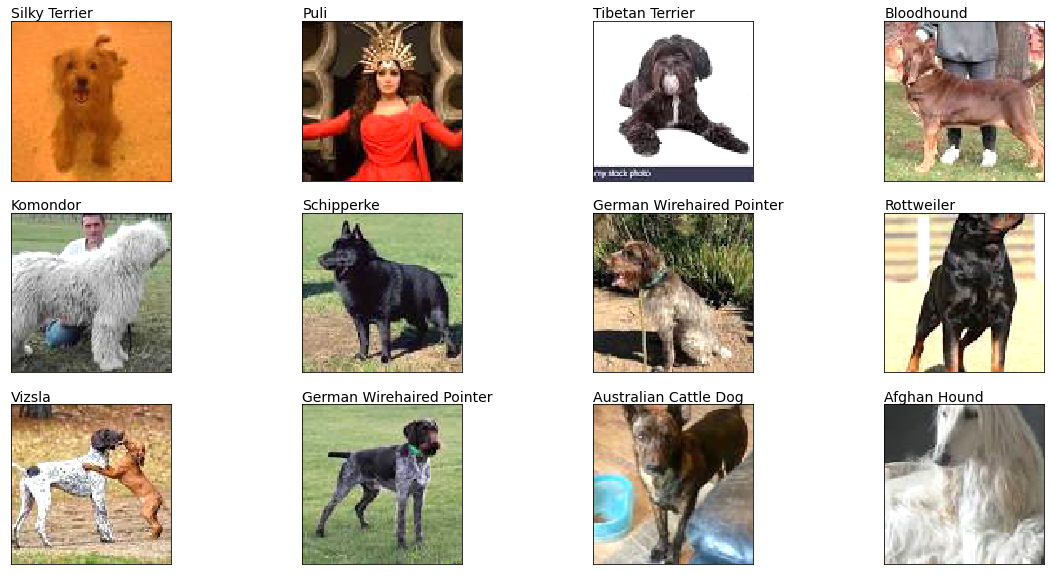

In [18]:
n_rows = 3
n_cols = 4
num_axes = 12

# fig = plot_images(n_rows, n_cols, num_axes, x_train, train_targets, categories)
fig = plot_images(n_rows, n_cols, num_axes, x_test, test_targets, categories)
fig.show()

# Model Training

In [19]:
def train_transfer_learning_vgg(x_train, y_train, x_validation, y_validation):
    """Fine tune pretrained VGG model."""

    base_model = VGG16(weights='imagenet', include_top=False)
    # print(base_model.summary())

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAvgPool2D()(x)
    # let's add a fully-connect layer
    x = Dense(1024, activation='relu')(x)
    # add a logistic layer -- with correct number of classes
    predictions = Dense(y_train.shape[1], activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    # print(model.summary())

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional layers of the model
    for layer in base_model.layers:
        layer.trainable = False

    # compile the model (should be done *after* setting layers to non-trainable)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    # train the model on the new fata for a few epochs
    model.fit(x_train, y_train, epochs=2, validation_data=(x_validation, y_validation), verbose=1, shuffle=True)
    # model.fit(train_vgg16, train_targets, epochs=20, validation_data=(valid_vgg16, valid_targets),
    #           callbacks=[checkpointer], verbose=1, shuffle=True)

    # at this point, the top layers are well trained and we can start fine-tuning
    # convolutional layers from vgg16. We will freeze the bottom N layers
    # and train the remaining top layers.

    # let's visualize layer names and layer indices to see how many layers
    # we should freeze:
    for i, layer in enumerate(base_model.layers):
        print(i, layer.name)

    # we chose to train the top block, i.e. we will freeze
    # the first 14 layers and unfreeze the rest:
    for layer in model.layers[:15]:
        layer.trainable = False
    for layer in model.layers[15:]:
        layer.trainable = True

    # we need to recompile the model for these modifications to take effect
    # we use SGD with a low learning rate
    model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

    # we train our model again (this time fine-tuning the top block
    # alongside the top Dense layers
    history = model.fit(x_train, y_train, epochs=2, validation_data=(x_validation, y_validation), verbose=1, shuffle=True)
    
    return model, history
    

In [389]:
model, history = train_transfer_learning_vgg(x_train, train_targets, x_valid, valid_targets)

Epoch 1/2
154/154 [==============================] - 46s 289ms/step - loss: 4.7556 - accuracy: 0.0165 - val_loss: 4.8435 - val_accuracy: 0.0051
Epoch 2/2
154/154 [==============================] - 44s 286ms/step - loss: 4.1208 - accuracy: 0.0907 - val_loss: 4.5627 - val_accuracy: 0.0256
0 input_5
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
Epoch 1/2
154/154 [==============================] - 50s 323ms/step - loss: 3.4026 - accuracy: 0.1928 - val_loss: 4.2280 - val_accuracy: 0.0474
Epoch 2/2
154/154 [==============================] - 49s 320ms/step - loss: 3.0267 - accuracy: 0.2766 - val_loss: 4.1791 - val_accuracy: 0.0615


In [20]:
model_path = projDir + 'dog_breed_classification/model'
model_path

'/content/drive/MyDrive/github_projects/dog_breed_classification/model'

In [391]:
model.save(model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/github_projects/dog_breed_classification/model/assets


Reconstruct the trained model


In [21]:
model = load_model(model_path)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

# Results

## Evolution of Loss Function

In [114]:
def plot_optimization_Results(history, epochs):
  """Plot evolution of optimization.
  
  :param history (tensorflow History)
  """

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

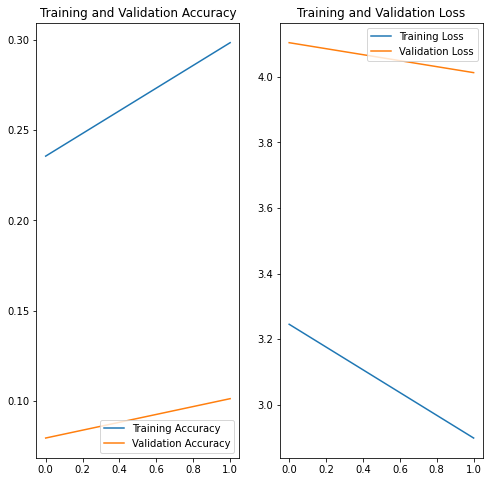

In [115]:
epochs = 2
plot_optimization_Results(history, epochs)

## Model Accuracy

In [33]:
def array_to_image(dataset):
  data = []

  for i in range(dataset.shape[0]):
    img = Image.fromarray(np.uint8(dataset[i] * dataset.shape[1]))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    data.append(x[0])

  data = np.array(data)

  return data

In [39]:
def get_accuracy(model, x_test, test_targets, categories):
  x_test_processed = array_to_image(x_test)

  # predict classes
  features = model.predict(x_test_processed)
  top_indices = np.array([features[i].argsort()[-1] for i in range(features.shape[0])])
  predicted_classes = np.array([categories[str(i).lower()] for i in top_indices])

  # get actual classes
  _, cols = np.where(test_targets == 1)
  actual_classes = np.array([categories[str(i).lower()] for i in cols])

  # compare predicted and actual values
  results_bool = (predicted_classes == actual_classes)

  # compute accuracy
  accuracy = np.sum(results_bool) / results_bool.shape[0]

  return accuracy


In [23]:
model.evaluate(x_test, test_targets)

36/36 [==============================] - 55s 441ms/step - loss: 3.8624 - accuracy: 0.1351


[3.8623714447021484, 0.13508771359920502]

In [35]:
x_test_processed = array_to_image(x_test)
model.evaluate(x_test_processed, test_targets)

36/36 [==============================] - 9s 247ms/step - loss: 76.6917 - accuracy: 0.1018


[76.69168853759766, 0.10175438225269318]

In [40]:
accuracy = get_accuracy(model, x_test, test_targets, categories)
print('Accuracy = {:.2f}'.format(accuracy))

Accuracy = 0.10


## Testing on Additional Images

In [120]:
test_image_path = projDir + 'dog_breed_classification/data/inp/additional_test_image.jpg'
%ls $test_image_path

/content/drive/MyDrive/github_projects/dog_breed_classification/data/inp/additional_test_image.jpg


In [122]:
def classify_image(img_path, model, top=3):
    """Example from Keras of how to classify single image with given model."""

    img = image.load_img(img_path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)[0]
    
    top_indices = features.argsort()[-top:][::-1]
    results = [{"breed": categories[str(i)], "percentage": '{:.2f}'.format(features[i] * 100.0)} for i in top_indices]
    return results

In [123]:
results = classify_image(test_image_path, model)
results

[{'breed': 'american_staffordshire_terrier', 'percentage': '100.00'},
 {'breed': 'bull_terrier', 'percentage': '0.00'},
 {'breed': 'basenji', 'percentage': '0.00'}]

# Accuracy of VGG16 model with test images

In [42]:
projDir = '/content/drive/MyDrive/github_projects/'
test_image_path = projDir + 'dog_breed_classification/data/inp/additional_test_image.jpg'

In [43]:
%ls $projDir

airbnb_seatle/  app/  dog_breed_classification/  miniconda/  README.md


In [44]:
def classify_image_vgg16(img_path, model):
    """Example from Keras of how to classify single image with given model."""

    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    # print('Predicted:', decode_predictions(features, top=3)[0])
    results = decode_predictions(features, top=3)
    results = [{"breed": res[1], 'percentage': '({:.2f} %)'.format(res[2] * 100.0)} for res in results[0]]
    for res in results: print(res)


In [45]:
pretrained_model = VGG16(weights='imagenet')

In [47]:
pretrained_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
classify_image_vgg16(test_image_path, pretrained_model)

{'breed': 'Doberman', 'percentage': '(57.57 %)'}
{'breed': 'miniature_pinscher', 'percentage': '(28.77 %)'}
{'breed': 'kelpie', 'percentage': '(8.08 %)'}


In [66]:
def get_accuracy_pretrained_model(model, x_test, test_targets, categories):
  # preprocess data
  x_test_processed = array_to_image(x_test)

  # get predictions
  features = model.predict(x_test_processed)
  results = decode_predictions(features, top=1)
  results = np.array(results)

  # process prediction (convert strings to lower case)
  predicted_classes = results[:, 0][:, 1]
  predicted_classes = np.array([s.lower() for s in predicted_classes])

  # get actual classes
  _, cols = np.where(test_targets == 1)
  actual_classes = np.array([categories[str(i).lower()] for i in cols])

  # compare predicted and actual values
  results_bool = (predicted_classes == actual_classes)

  # compute accuracy
  accuracy = np.sum(results_bool) / results_bool.shape[0]

  return accuracy


In [67]:
accuracy = get_accuracy_pretrained_model(pretrained_model, x_test, test_targets, categories)
print('Accuracy = {:.2f}'.format(accuracy))

Accuracy = 0.22


# TODO

- Check what classes are misclassified.